In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
matplotlib.rcParams.update({"font.family":"serif"})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [8]:
# MODEL = "0110"

# CASES = [
#     "sim_wom_rcr"
# ]

# paths = [
#     "aorta",
# ]

# meshes = [
#     "coarse",
#     "medium",
#     "fine",
#     "fine_2",
#     "fine_3"
# ]

# #mesh_sizes = [0.5,0.33,0.22,0.15]
# mesh_sizes = [0.3,0.2,0.15]
# use_meshes=[0,2,3]
# FINE_MESH = 4

MODEL = "0144"

CASES = [
    "sim_wom_rcr"
]

paths = [
    "aorta",
]

meshes = [
    "coarse",
    "medium",
    "fine",
    "fine_2",
]

#mesh_sizes = [0.5,0.33,0.22,0.15]
mesh_sizes = [0.2,0.15,0.125]
use_meshes=[0,1,2]
FINE_MESH = 3

# MODEL = "coronary"

# paths = [
#     "lc1",
# ]

# CASES = [
#     "sim_cor_inflow"
# ]

# meshes = [
#     "coarse",
#     "medium",
#     "fine"
# ]

# mesh_sizes = [0.05,0.04]
# FINE_MESH = 2

quants   = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

generation = "converge"

models   = list(range(1))
dt       = 0.004

tups = []

for case in CASES:
    for p in paths:
            for m in meshes:
                    CSV    = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+case+"/converge"+'/'+p+".csv"
                    
                    OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+case+"/"+str(generation)+"/"+m
                    io.mkdir(OUTPUT)
                    OUTPUT = OUTPUT+'/'+p
                    io.mkdir(OUTPUT)
                    print(CSV)
                    df = pd.read_csv(CSV)
                    
                    points = df['point'].unique()
                    point_start = points[-2]
                    point_end = points[-2]
                    
                    df = df.loc[df['point'] >= point_start]
                    df = df.loc[df['point'] <= point_end]
                    df = df.loc[df['mesh']==m]
                    
                    df = df.groupby(['time',"model"]).mean()
                    
                    tups.append( (case,p,m,df,OUTPUT) )
                    
DATA = [t[3] for t in tups]

/media/marsdenlab/Data1/UQ/0144/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0144/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0144/sim_wom_rcr/converge/aorta.csv
/media/marsdenlab/Data1/UQ/0144/sim_wom_rcr/converge/aorta.csv


In [9]:
print(df.iloc[:5])

            Unnamed: 0     area   length        nx        ny        nz  point  \
time model                                                                      
3500 0           36006  0.37266  2.17611 -0.006667 -0.076767 -0.996437    175   
3510 0           36007  0.37266  2.17611 -0.006667 -0.076767 -0.996437    175   
3520 0           36008  0.37266  2.17611 -0.006667 -0.076767 -0.996437    175   
3530 0           36009  0.37266  2.17611 -0.006667 -0.076767 -0.996437    175   
3540 0           36010  0.37266  2.17611 -0.006667 -0.076767 -0.996437    175   

               pressure_0  pressure_0_boundary  radius_actual    ...      \
time model                                                       ...       
3500 0      125332.748014        125332.085343       0.344414    ...       
3510 0      137497.831695        137496.616133       0.344414    ...       
3520 0      156196.102479        156211.211388       0.344414    ...       
3530 0      172129.702635        172179.769474      

In [10]:
df_group = df.groupby('model').get_group(0)
df_group.iloc[:5]

,,Unnamed: 0,area,length,nx,ny,nz,point,pressure_0,pressure_0_boundary,radius_actual,...,velocity_0_boundary,velocity_1,velocity_1_boundary,velocity_2,velocity_2_boundary,velocity_3,velocity_3_boundary,x,y,z
time,model,,,,,,,,,,,,,,,,,,,,,
3500,0,36006,0.37266,2.17611,-0.006667,-0.076767,-0.996437,175,125332.748014,125332.085343,0.344414,...,0.0,-1.569591,0.0,-16.671066,0.0,16.746327,0.0,8.16923,20.639171,-75.370753
3510,0,36007,0.37266,2.17611,-0.006667,-0.076767,-0.996437,175,137497.831695,137496.616133,0.344414,...,0.0,-5.155649,0.0,-55.956312,0.0,56.220761,0.0,8.16923,20.639171,-75.370753
3520,0,36008,0.37266,2.17611,-0.006667,-0.076767,-0.996437,175,156196.102479,156211.211388,0.344414,...,0.0,-8.764920,0.0,-111.873747,0.0,112.502962,0.0,8.16923,20.639171,-75.370753
3530,0,36009,0.37266,2.17611,-0.006667,-0.076767,-0.996437,175,172129.702635,172179.769474,0.344414,...,0.0,-11.472425,0.0,-153.845311,0.0,155.120228,0.0,8.16923,20.639171,-75.370753
3540,0,36010,0.37266,2.17611,-0.006667,-0.076767,-0.996437,175,182731.660350,183203.083292,0.344414,...,0.0,-11.770332,0.0,-173.601530,0.0,177.542192,0.0,8.16923,20.639171,-75.370753


In [11]:
d = tups[0][3]
print(d.shape)
print(len(tups))

(51, 30)
4


No handles with labels found to put in legend.


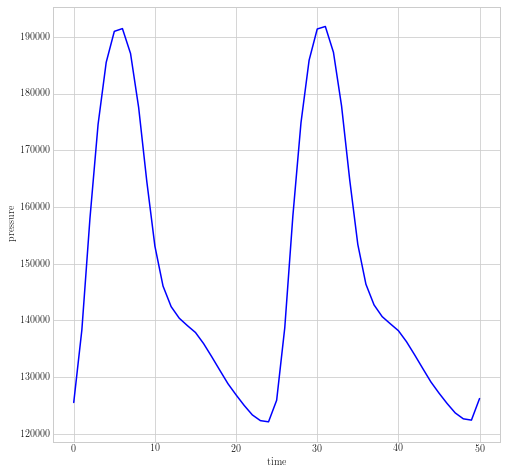

No handles with labels found to put in legend.


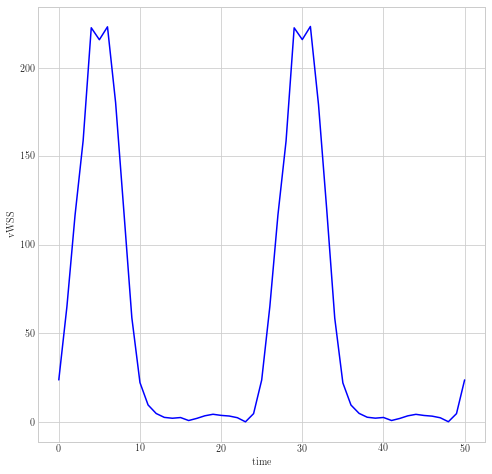

No handles with labels found to put in legend.


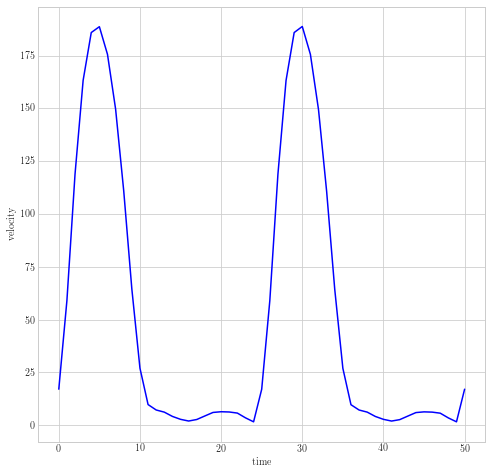

No handles with labels found to put in legend.


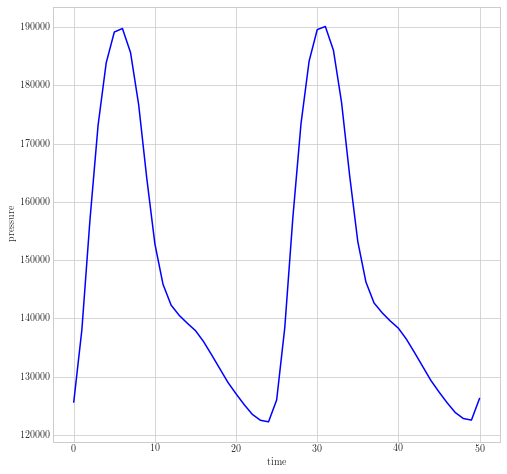

No handles with labels found to put in legend.


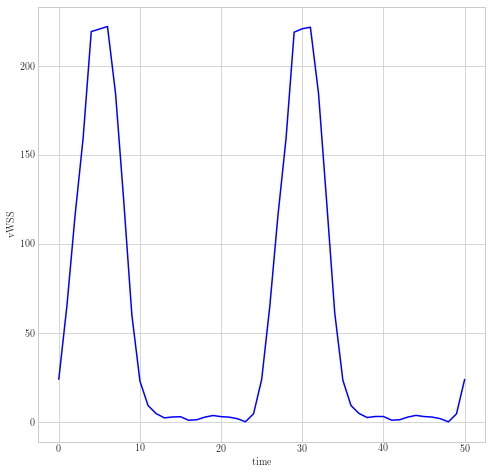

No handles with labels found to put in legend.


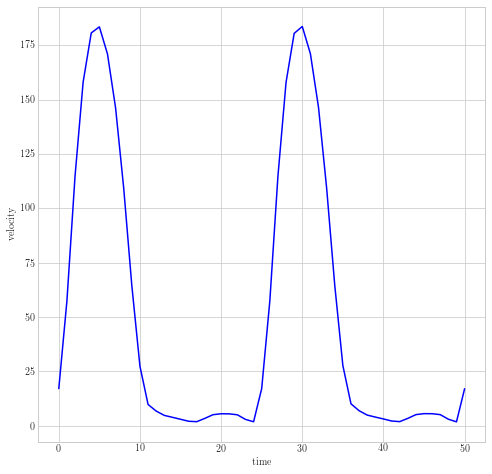

No handles with labels found to put in legend.


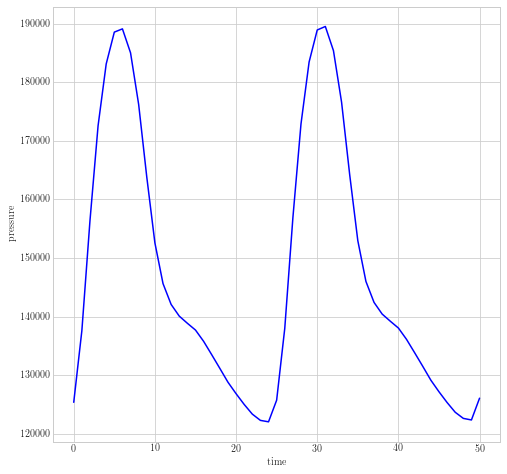

No handles with labels found to put in legend.


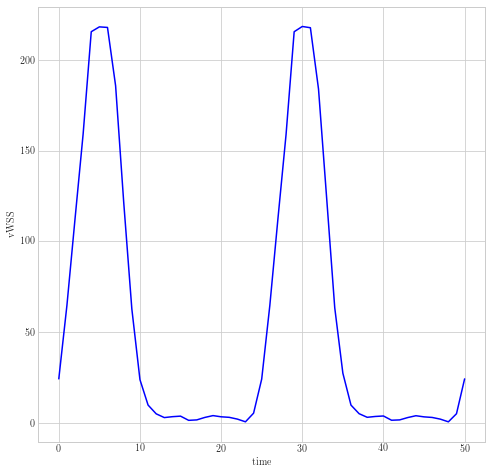

No handles with labels found to put in legend.


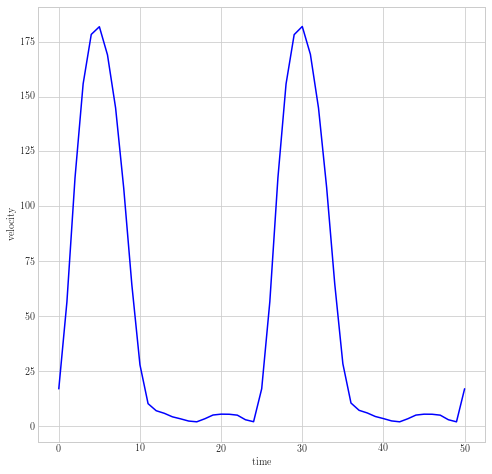

No handles with labels found to put in legend.


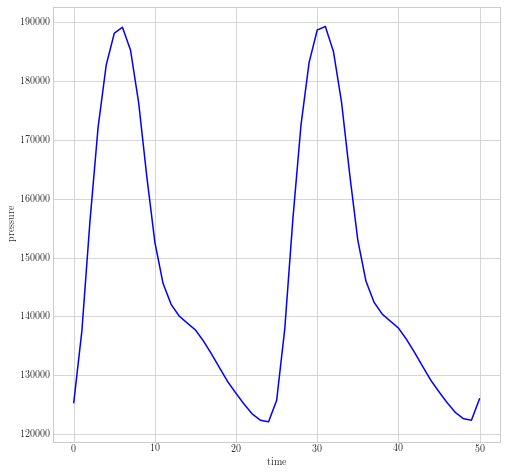

No handles with labels found to put in legend.


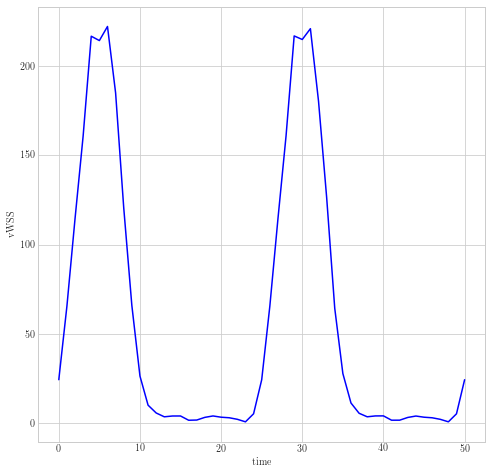

No handles with labels found to put in legend.


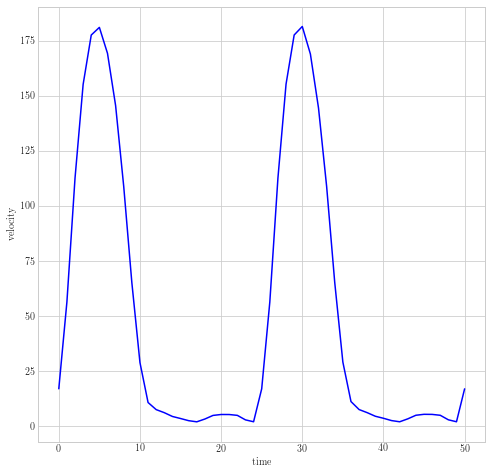

In [12]:
for t in tups:
    case,path,mesh,df,OUTPUT = t
    df_group = df.groupby('model')
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df_group.get_group(m)

            if data.shape[0] == 0: continue

            y = data[q].values
            #x = data['time'].values*dt

            #series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        #X = np.array(series_x)
        
        label = q.split('_')[0]
        
        plt.figure(figsize=(8,8))
        plt.plot(Y.T, color='b')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'.pdf',dpi=200)
        
        plt.show()
        plt.close()

No handles with labels found to put in legend.


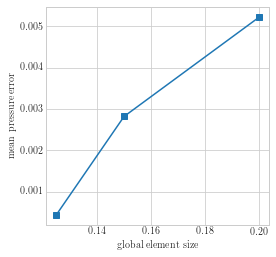

No handles with labels found to put in legend.


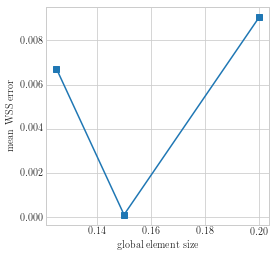

No handles with labels found to put in legend.


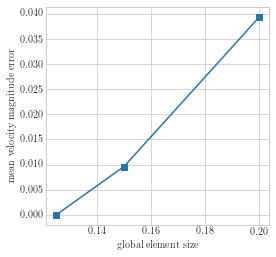

In [13]:
T = 30
#mesh_sizes = [0.3,0.15]
#mesh_sizes = [0.2,0.125]

labels = ['mean pressure error',
          'mean WSS error',
          'mean velocity magnitude error']
for j,q in enumerate(quants):
        label = q.replace('_','')
        err = []
        y_fine = np.mean(DATA[FINE_MESH][q].values)
        
        for i in use_meshes:
            y_mesh = np.mean(DATA[i][q].values)

            err.append(np.mean(np.abs((y_fine-y_mesh)/(y_fine))))

        
        label = labels[j]
        plt.figure(figsize=(4,4))
        plt.plot(mesh_sizes, err, marker='s')
        plt.xlabel("global element size")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'_err_converge.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'_err_converge.pdf',dpi=200)

        plt.show()
        plt.close()

No handles with labels found to put in legend.


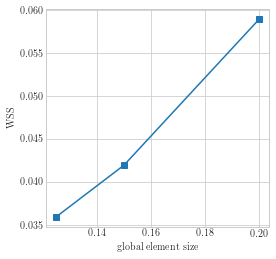

In [14]:
q = "vWSS_3_boundary"
label = "WSS"
err = [0.059,0.042,0.036]
plt.figure(figsize=(4,4))
plt.plot(mesh_sizes, err, marker='s')
plt.xlabel("global element size")
plt.ylabel(label)
plt.legend()
plt.savefig(OUTPUT+'/'+q+'_err_converge.png',dpi=300)
plt.savefig(OUTPUT+'/'+q+'_err_converge.pdf',dpi=200)

plt.show()
plt.close()